In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess data
X_train = X_train.reshape(-1, 28, 28) / 255.0
X_test = X_test.reshape(-1, 28, 28) / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation ='relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')


Epoch 1/10


C:\Users\ya313\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.4975
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1068
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0718
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.0567
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0443
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9903 - loss: 0.0313
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0268
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0250
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0203
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0198
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9744 - loss: 0.1045
Test accuracy: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


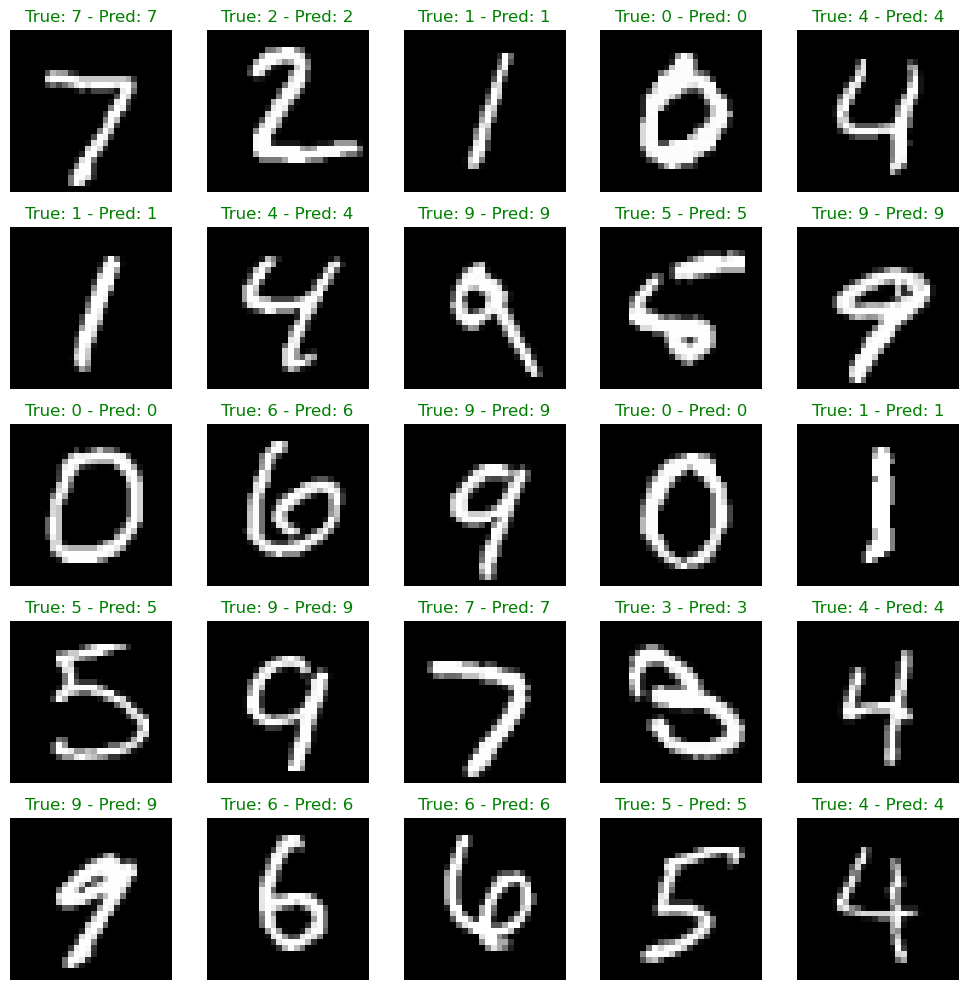

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
predictions = model.predict(X_test)

# Set up the plot
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Loop through the first 25 test images
for i, ax in enumerate(axes.flat):
    # Get the image and its corresponding label and prediction
    img = X_test[i]
    true_label = y_test[i].argmax()  # Get the true label from the one-hot encoding
    predicted_label = np.argmax(predictions[i])  # Get the predicted label

    # Display the image
    ax.imshow(img, cmap='gray')
    ax.axis('off')

    # Check if the prediction is correct and set color accordingly
    if true_label == predicted_label:
        ax.set_title(f'True: {true_label} - Pred: {predicted_label}', color='green')
    else:
        ax.set_title(f'True: {true_label} - Pred: {predicted_label}', color='red')

plt.tight_layout()
plt.show()


In [53]:
model.save('mnist_model.h5')

تم تحميل الصور بنجاح!
عدد الصور: 10
شكل الصور: (10, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


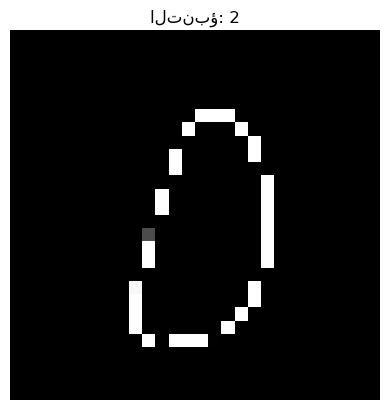

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


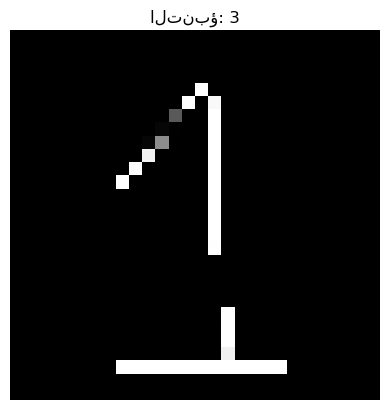

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


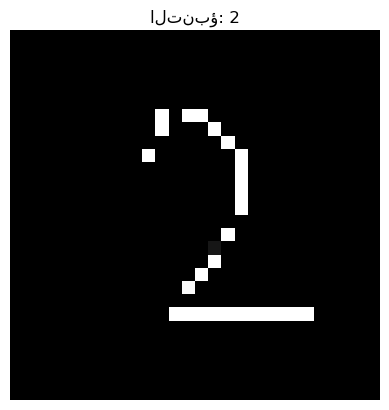

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


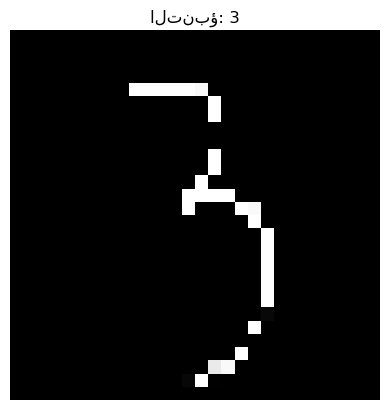

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


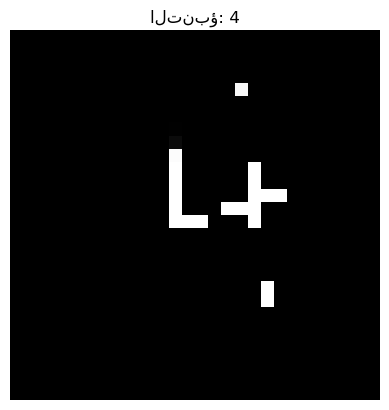

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


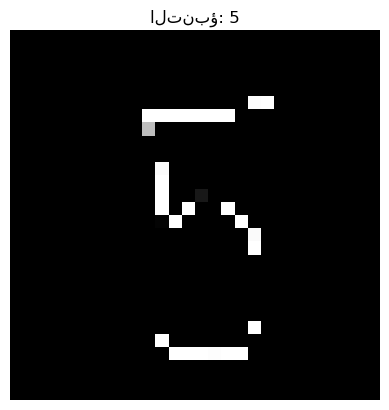

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


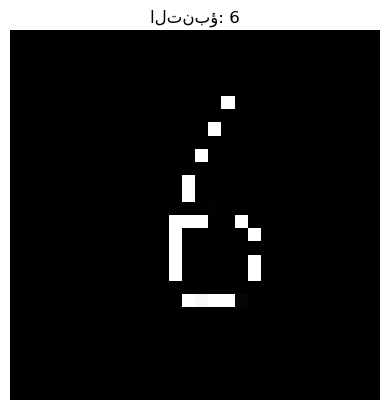

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


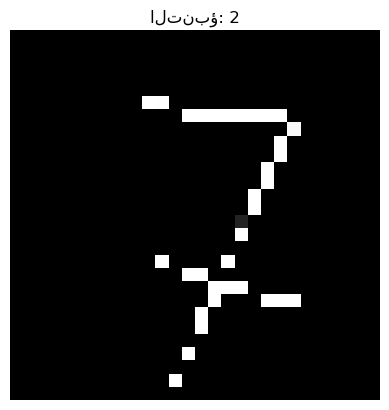

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


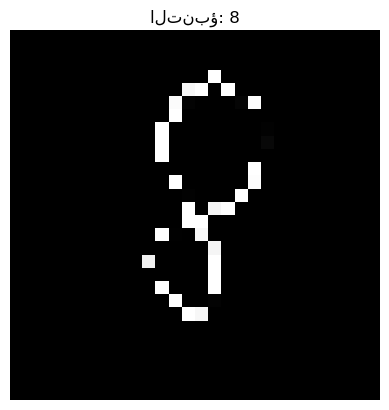

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


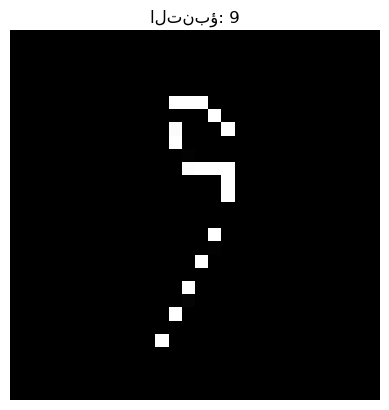

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image

# مسار المجلد الذي يحتوي على الصور
folder_path = r"C:\Users\ya313\OneDrive\Images\images digit"  # استبدل بالمسار الفعلي

# تحميل النموذج المدرب
model = load_model('mnist_model.h5')  # استبدل باسم ملف النموذج إذا كان مختلفًا

# قراءة جميع الصور من المجلد
image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

# قائمة لتخزين الصور المحملة
images = []

for img_path in image_paths:
    # تحميل الصورة وتحجيمها إلى 28x28 وتحويلها إلى تدرج رمادي
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array.reshape(28, 28) / 255.0  # تطبيع الصورة
    images.append(img_array)

# تحويل قائمة الصور إلى مصفوفة NumPy
images = np.array(images)

# طباعة تفاصيل الصور
print("تم تحميل الصور بنجاح!")
print("عدد الصور:", len(images))
print("شكل الصور:", images.shape)

# اختبار النموذج على الصور المحملة
for i, img in enumerate(images):
    # التأكد من أن الصورة لها البعد المطلوب (28, 28, 1)
    img = np.expand_dims(img, axis=-1)  # إضافة البعد الأخير
    img = np.expand_dims(img, axis=0)  # إضافة البُعد الأول (batch size)

    # توقع التصنيف
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    # عرض الصورة مع التنبؤ
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"التنبؤ: {predicted_label}")
    plt.axis('off')
    plt.show()
